# 0. Bibliothèques utilisées

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# 1. Récupération des salaires des joueurs

### Connexion à la page

In [2]:
page = requests.get("https://hoopshype.com/salaries/players/2018-2019/") # Assigne le contenu de la page web obtenue avec ce lien à notre variable page
soup = BeautifulSoup(page.text, 'html.parser') #analyse syntaxique de la page web

In [3]:
#page #On obtient response 200 donc le chemin d'accès est confirmé

In [4]:
#print(soup.prettify) #permet de mieux afficher le résultat

### Récupération des noms des joueurs et de leurs salaires

In [5]:
players_names = []
players_salaries = []

#On recupère tout le texte à partir de la div : hh-salaries-ranking-table hh-salaries-table-sortable responsive 
players_infos_list = soup.find(attrs={'class' : 'hh-salaries-ranking-table hh-salaries-table-sortable responsive'})

#On récupère le texte des balises 'td' à l'interieur de la div hh-salaries-ranking-table hh-salaries-table-sortable responsive    
salaries = players_infos_list.find_all('td',class_="")[2:]
names = players_infos_list.find_all('td',class_="name")[1:]
     
index = 0
for salary in salaries :
    if index%2==0:
        players_salaries.append(salary.string.strip())
    index+=1
    
for name in names:
    players_names.append(name.get_text().strip())

### Formatage de certains noms

#### On veut faire correspondre les noms des joueurs du site pour les salaires avec les noms des joueurs du site pour les statistiques 

In [6]:
#Traitement (renommage) automatique pour des problèmes de noms récurrents
indice = 0
for name in players_names:
    if name.find("III")>=0:
        players_names[indice]=name[:-4].strip()
    if (name.find("Jr")>=0 and name.find("Jrue")<0) or name.find("II")>=0:
        players_names[indice]=name[:-3].strip()
    indice+=1

In [7]:
#Traitement (renommage) manuel de certains joueurs : cas particuliers
players_names[493]='Cameron Reynolds'
players_names[371]="DeAndre' Bembry"
players_names[74]='Dennis Schroder'
players_names[441]="Devonte' Graham"
players_names[50]="Enes Freedom"
players_names[189]="Ish Smith"
players_names[239]="JJ Barea"
players_names[326]='Juancho Hernangomez'
players_names[160]='Lou Williams'
players_names[122]='Maurice Harkless'
players_names[550]='Naz Mitrou-Long'
players_names[241]='Nene'
players_names[116]='Patty Mills'
players_names[438]='Ray Spalding'
players_names[402]="Svi Mykhailiuk"
players_names[345]='Timothe Luwawu-Cabarrot'
players_names[488]='Walt Lemon'
players_names[421]='Wes Iwundu'

# 2. Récupération des statistiques des joueurs

### Connexion à la page à l'aide des headers et des cookies

In [8]:
url = "https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2018-19&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight="

cookies_dict = {"Set-Cookie": "ak_bmsc=348F9C35ABDA3574EAC872CC04114778~000000000000000000000000000000~YAAQavASAiaFLgx/AQAA8Ie2SQ5pm5OK1QaDXVbQtQmE4dx/XNYsyJcIq5ia2rkbnQKIGgRdrkU3kLAkZqOt/p2UO6DGsryXTYxN4jp+o3j3pzO8tjflMc9TAKFqgAjdms9ZNFuqgaIaXl3HYQpoV3TchYW9R6savOp/lE/M28WWRYJJr8d42rtMJ7dUEzH0FnS+64ktRGaDhawKpkX0ZRr+BDJpjeFs2NWSlfqQH1P8zihL3oBG1KegAeC4blwhc1qNgvS0XqC7mJnIFolmzjuhI+Pq6WVKuiB+x95nc1eAR7OodIAEj1SpD5K74dMi99Nf7Q2+4MKtSEOBaoBTCL2YMskPYBIwwXYFFgjXa9uucxV9glgI5pWB; Domain=.nba.com; Path=/; Expires=Wed, 02 Mar 2022 10:19:33 GMT; Max-Age=7200; HttpOnly"}

headers = {
    "Accept": "application/json, text/plain, */*",
    "Accept-Encoding": "gzip, deflate, br",
    "Accept-Language": "fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7",
    "Connection": "keep-alive",
    "Host": "stats.nba.com",
    "If-Modified-Since": "Wed, 02 Mar 2022 08:04:31 GMT",
    "Origin": "https://www.nba.com",
    "Referer": "https://www.nba.com/",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-site",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36",
    "x-nba-stats-origin": "stats",
    "x-nba-stats-token": "true"
}

page = requests.get(url, headers=headers, cookies=cookies_dict)

In [9]:
page #On obtient response 200 donc le chemin d'accès est confirmé

<Response [200]>

### Récupération des données qui nous intéressent

In [10]:
dicti = page.json() #Pour lire le fichier json
dicti.keys()

dict_keys(['resource', 'parameters', 'resultSets'])

In [11]:
data = dicti['resultSets'][0] #Pour récupérer les ressources
data.keys()

dict_keys(['name', 'headers', 'rowSet'])

In [12]:
df = pd.DataFrame(data['rowSet']) #On construit la dataframe à partir de 'rowSet' qui contient les observations
df.columns = data['headers'] #On renomme les colonnes à partir de 'headers'

### Formatage de certains noms (même problèmatique que la partie précédente)

In [13]:
noms = []

for indice in range(len(df['PLAYER_NAME'])):
    name = df['PLAYER_NAME'][indice]
    if name.find("Jr.")>=0 or name.find("Sr.")>=0 or name.find("III")>=0:
        name=name[:-4]
    if name.find("II")>=0 or name.find("IV")>=0:
        name=name[:-3]
    while name.find(".")>=0:
        i=name.find(".")
        name=name[:i]+name[i+1:]
    noms.append(name)
    
df['PLAYER_NAME']=noms

# 3. Jointure des deux tables (salaires et statistiques) à l'aide des noms

In [14]:
salaires = []
for name in df['PLAYER_NAME']:
    indice = players_names.index(name.strip())
    salaires.append(players_salaries[indice][1:].replace(",",""))
    
if "SALARIES" in df :
    df["SALARIES"]=salaires
else:
    df.insert(loc = len(df.columns),column='SALARIES',value=salaires,allow_duplicates=False)
    
df["SALARIES"]=pd.to_numeric(df["SALARIES"])

In [15]:
df

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,SALARIES
0,203932,Aaron Gordon,Aaron,1610612753,ORL,23.0,78,40,38,0.513,...,155,54,68,128,58,34,38,5,"203932,1610612753",21590909
1,1628988,Aaron Holiday,Aaron,1610612754,IND,22.0,50,31,19,0.620,...,352,274,319,91,365,261,38,5,"1628988,1610612754",1914480
2,1627846,Abdel Nader,Abdel,1610612760,OKC,25.0,61,38,23,0.623,...,409,421,404,428,430,261,38,5,"1627846,1610612760",1378242
3,201143,Al Horford,Al,1610612738,BOS,33.0,68,41,27,0.603,...,240,184,104,46,56,70,16,5,"201143,1610612738",28928710
4,202329,Al-Farouq Aminu,Al-Farouq,1610612757,POR,28.0,81,52,29,0.642,...,256,178,190,27,146,60,38,5,"202329,1610612757",6957105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,203897,Zach LaVine,Zach,1610612741,CHI,24.0,63,16,47,0.254,...,148,35,18,499,38,159,38,5,"203897,1610612741",19500000
526,1629155,Zach Lofton,Zach,1610612765,DET,26.0,1,1,0,1.000,...,512,513,521,226,519,261,38,5,"1629155,1610612765",77250
527,2585,Zaza Pachulia,Zaza,1610612765,DET,35.0,68,35,33,0.515,...,149,150,408,351,347,261,38,5,"2585,1610612765",2393887
528,1629015,Zhaire Smith,Zhaire,1610612755,PHI,20.0,6,2,4,0.333,...,371,393,286,77,324,261,38,5,"1629015,1610612755",2615160


### Conservation des statistiques intéressantes pour notre DOE

In [16]:
#Masque initiale si on veut utiliser l'ensemble des caractéristiques
mask_bdd = ['PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_ABBREVIATION','AGE','GP','W_PCT','FG_PCT','FG3_PCT','FT_PCT','REB','AST','TOV','STL','BLK','PF','PTS',
            'SALARIES']

#Masque utilité dans notre DOE afin de conserver les caractéristiques qui nous semblent pertinentes
mask_doe = ['PLAYER_NAME','GP','W_PCT','FG_PCT','FT_PCT','REB','AST','STL','BLK','PTS','SALARIES']

#On applique le masque de notre DOE à notre dataframe
df_doe = df[mask_doe]

In [17]:
df_doe

,PLAYER_NAME,GP,W_PCT,FG_PCT,FT_PCT,REB,AST,STL,BLK,PTS,SALARIES
0,Aaron Gordon,78,0.513,0.449,0.731,7.4,3.7,0.7,0.7,16.0,21590909
1,Aaron Holiday,50,0.620,0.401,0.820,1.3,1.7,0.4,0.3,5.9,1914480
2,Abdel Nader,61,0.623,0.423,0.750,1.9,0.3,0.3,0.2,4.0,1378242
3,Al Horford,68,0.603,0.535,0.821,6.7,4.2,0.9,1.3,13.6,28928710
4,Al-Farouq Aminu,81,0.642,0.433,0.867,7.5,1.3,0.8,0.4,9.4,6957105
...,...,...,...,...,...,...,...,...,...,...,...
525,Zach LaVine,63,0.254,0.467,0.832,4.7,4.5,1.0,0.4,23.7,19500000
526,Zach Lofton,1,1.000,0.000,0.000,0.0,0.0,1.0,0.0,0.0,77250
527,Zaza Pachulia,68,0.515,0.440,0.782,3.9,1.3,0.5,0.3,3.9,2393887
528,Zhaire Smith,6,0.333,0.412,0.750,2.2,1.7,0.3,0.3,6.7,2615160


### Formatage en CSV

In [18]:
df_doe.set_index('PLAYER_NAME', inplace = True) #On définit le nom des joueurs comme notre nouvel index
df_doe

,GP,W_PCT,FG_PCT,FT_PCT,REB,AST,STL,BLK,PTS,SALARIES
PLAYER_NAME,,,,,,,,,,
Aaron Gordon,78,0.513,0.449,0.731,7.4,3.7,0.7,0.7,16.0,21590909
Aaron Holiday,50,0.620,0.401,0.820,1.3,1.7,0.4,0.3,5.9,1914480
Abdel Nader,61,0.623,0.423,0.750,1.9,0.3,0.3,0.2,4.0,1378242
Al Horford,68,0.603,0.535,0.821,6.7,4.2,0.9,1.3,13.6,28928710
Al-Farouq Aminu,81,0.642,0.433,0.867,7.5,1.3,0.8,0.4,9.4,6957105
...,...,...,...,...,...,...,...,...,...,...
Zach LaVine,63,0.254,0.467,0.832,4.7,4.5,1.0,0.4,23.7,19500000
Zach Lofton,1,1.000,0.000,0.000,0.0,0.0,1.0,0.0,0.0,77250
Zaza Pachulia,68,0.515,0.440,0.782,3.9,1.3,0.5,0.3,3.9,2393887


In [19]:
df_doe.to_csv("NBA_data_csv.csv", sep =';') #On exporte le dataframe au format CSV

In [20]:
df_doe.info() #On observe des informations générales à partir de notre dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, Aaron Gordon to Zhou Qi
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GP        530 non-null    int64  
 1   W_PCT     530 non-null    float64
 2   FG_PCT    530 non-null    float64
 3   FT_PCT    530 non-null    float64
 4   REB       530 non-null    float64
 5   AST       530 non-null    float64
 6   STL       530 non-null    float64
 7   BLK       530 non-null    float64
 8   PTS       530 non-null    float64
 9   SALARIES  530 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 45.5+ KB


In [21]:
df_doe.describe() #On observe des statistiques générales à partir de notre dataframe

,GP,W_PCT,FG_PCT,FT_PCT,REB,AST,STL,BLK,PTS,SALARIES
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
mean,49.247170,0.491632,0.439911,0.696775,3.613208,1.921509,0.617736,0.391321,8.613585,6.518245e+06
std,26.048763,0.188127,0.111819,0.214880,2.535348,1.774592,0.413051,0.405445,6.110396,7.868839e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.737000e+04
25%,27.000000,0.385250,0.402000,0.651500,1.800000,0.725000,0.300000,0.100000,4.000000,1.378242e+06
50%,56.000000,0.500000,0.438500,0.750000,3.100000,1.300000,0.500000,0.300000,7.000000,2.756387e+06
75%,73.000000,0.622250,0.489500,0.818000,4.700000,2.500000,0.900000,0.500000,11.675000,9.520185e+06
max,82.000000,1.000000,1.000000,1.000000,15.600000,10.700000,2.200000,2.700000,36.100000,3.745715e+07


# 4. Création de la database SQLite

In [22]:
conn = sqlite3.connect('nbastats_database_sqlite') #Pour créer une connexion avec notre BDD (génère un fichier vide)
c = conn.cursor() #On crée un curseur pour intéragir avec la BDD

In [23]:
#Instruction classique en SQL
c.execute('CREATE TABLE IF NOT EXISTS NBAstats (PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,SALARIES,AGE,GP,W_PCT,FG_PCT,FG3_PCT,FT_PCT,REB,AST,TOV,STL,BLK,PF,PTS)')
conn.commit() #COMMIT pour valider la transaction (ici l'instruction précédente)

In [24]:
df_doe.to_sql('NBA_STATS', conn, if_exists='replace', index = False) #On crée une table NBA_STATS avec le COMMIT de la transaction précédente

#### On fait une requête sur la BDD que l'on vient de générer pour s'assurer de son fonctionnement

In [25]:
sql = """select GP,SALARIES from NBA_STATS where SALARIES>30000000"""
#sql = """select REB, AST, STL from NBA_STATS """ #Une autre requête pour varier
query_results = c.execute(sql).fetchall() #On sauvegarde les résultats après exécutions dans cette variable
df_sql = pd.DataFrame(query_results) #On transforme nos résultats en dataframe 

In [26]:
df_sql

,0,1
0,75,31873932
1,58,35654150
2,72,31214295
3,78,30570000
4,65,32700000
5,55,35654150
6,70,30521115
7,77,30560700
8,73,35665000
9,69,37457154


# 5. Annexes (hors projet/complémentaire)

## 5.1. Avec un autre site pour les stats (Cf. rapport)

In [27]:
#On vient accéder et récupérer la page voulue
url2 = 'https://www.basketball-reference.com/leagues/NBA_2021_per_game.html'
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.content,'html.parser')

In [28]:
#On vient récupérer et contruire nos données de joueurs
tableau = soup2.find_all(class_='full_table')
joueur = []

for j in tableau[1].find_all('td'):
    print(j)
    joueur.append(j.text)
#print(joueur)

joueurs = []

for i in range(len(tableau)):
    joueur = []
    for j in tableau[i].find_all('td'):
        joueur.append(j.text)
    joueurs.append(joueur)   
#print(joueurs)

<td class="left" csk="Adams,Jaylen" data-append-csv="adamsja01" data-stat="player"><a href="/players/a/adamsja01.html">Jaylen Adams</a></td>
<td class="center" data-stat="pos">PG</td>
<td class="right" data-stat="age">24</td>
<td class="left" data-stat="team_id"><a href="/teams/MIL/2021.html">MIL</a></td>
<td class="right" data-stat="g">7</td>
<td class="right iz" data-stat="gs">0</td>
<td class="right non_qual" data-stat="mp_per_g">2.6</td>
<td class="right non_qual" data-stat="fg_per_g">0.1</td>
<td class="right non_qual" data-stat="fga_per_g">1.1</td>
<td class="right non_qual" data-stat="fg_pct">.125</td>
<td class="right non_qual iz" data-stat="fg3_per_g">0.0</td>
<td class="right non_qual" data-stat="fg3a_per_g">0.3</td>
<td class="right non_qual iz" data-stat="fg3_pct">.000</td>
<td class="right non_qual" data-stat="fg2_per_g">0.1</td>
<td class="right non_qual" data-stat="fg2a_per_g">0.9</td>
<td class="right non_qual" data-stat="fg2_pct">.167</td>
<td class="right non_qual" da

In [29]:
#On vient récupérer le nom des colonnes de notre dataframe
head2 = soup2.find(class_ = 'thead')
nom_colonnes = [head2.text for item in head2][0] #On accède à l'ensemble des colonnes
#print(nom_colonnes)
nom_colonnes_correct = nom_colonnes.split('\n')[2:-1] #On recupère uniquement les colonnes qui nous intéressent
#print(nom_colonnes_correct)

In [30]:
df2 = pd.DataFrame(joueurs,columns = nom_colonnes_correct).set_index('Player') #On construit le dataframe avec le nom des joueurs comme index
df2

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,.544,0.0,...,.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0
Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,.125,0.0,...,,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3
Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,.614,0.0,...,.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6
Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,.570,0.0,...,.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7
LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,.473,1.2,...,.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Delon Wright,SG-PG,28,TOT,63,39,27.7,3.8,8.2,.463,1.0,...,.802,1.0,3.2,4.3,4.4,1.6,0.5,1.3,1.2,10.2
Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,.559,0.2,...,.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1
Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,.438,2.2,...,.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, Precious Achiuwa to Ivica Zubac
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Pos     540 non-null    object
 1   Age     540 non-null    object
 2   Tm      540 non-null    object
 3   G       540 non-null    object
 4   GS      540 non-null    object
 5   MP      540 non-null    object
 6   FG      540 non-null    object
 7   FGA     540 non-null    object
 8   FG%     540 non-null    object
 9   3P      540 non-null    object
 10  3PA     540 non-null    object
 11  3P%     540 non-null    object
 12  2P      540 non-null    object
 13  2PA     540 non-null    object
 14  2P%     540 non-null    object
 15  eFG%    540 non-null    object
 16  FT      540 non-null    object
 17  FTA     540 non-null    object
 18  FT%     540 non-null    object
 19  ORB     540 non-null    object
 20  DRB     540 non-null    object
 21  TRB     540 non-null    object
 22  AST     

In [32]:
df2['Age'] = df2['Age'].astype(str).astype(int) #Pour convertir les str en int afin de faire des opérations mathématiques 
df2['Age'].describe #Informations statistiques générales sur notre colonne 'Age'

<bound method NDFrame.describe of Player
Precious Achiuwa     21
Jaylen Adams         24
Steven Adams         27
Bam Adebayo          23
LaMarcus Aldridge    35
                     ..
Delon Wright         28
Thaddeus Young       32
Trae Young           22
Cody Zeller          28
Ivica Zubac          23
Name: Age, Length: 540, dtype: int32>

In [33]:
df2['Age'].mean() #On calcule la moyenne d'age des joueurs

25.555555555555557

## 5.2. Machine Learning

In [34]:
mask_data = ['GP','W_PCT','FG_PCT','FT_PCT','REB','AST','STL','BLK','PTS']

data = df[mask_data]
target = df['SALARIES']

In [35]:
from sklearn.model_selection import train_test_split

#On split les données pour avoir une partie entraînement et une partie test
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.10)

In [36]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (477, 9)
y_train shape: (477,)
X_test shape: (53, 9)
y_test shape: (53,)


In [37]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

clf_lr = lr 

clf_lr.fit(X_train, y_train) 

train_score = clf_lr.score(X_train,y_train)
test_score = clf_lr.score(X_test,y_test)

In [38]:
print(train_score,test_score)

0.49924102186984354 0.23550134920941046


In [39]:
from sklearn.model_selection import cross_val_score

#On utilise la validation croisée pour vérifier la précision de notre modèle
cross_val = cross_val_score(lr,data,target,cv = 5)

print(cross_val.mean())

0.45227451958648235


In [40]:
pred = clf_lr.predict(X_test)
reel = np.array(y_test)

In [41]:
print(pred)
print(reel)

[11703758.50144123  2479642.48320185 19220173.64675011  6054502.72212382
  5232023.8494401   8327236.56088004 19784329.79375935  8365836.65952166
  1916482.40353621  1492056.73664079 11439600.52952533  5984238.6713154
 12171337.06703798 14568132.47962555  3446699.94953112   365389.52473694
  6142081.93532043  2003568.88776454  9329596.75924981  3217757.68959978
  3680424.11985442  1667301.38979567  6910317.59975152  8387075.57065493
 11396696.7393763   3609513.29463061  5579640.08248255  3258042.46719013
  4233780.49328638  4258559.72246049  1354901.37014025  2163162.54745867
  2339921.87935366   205837.8447069   9771292.32803217   530437.71907592
  4111601.44894683  2874873.19139324 18128593.3069946  13969530.98265269
 10780468.77767028  6726521.44580979 14217901.88335965  1936507.49083305
  8713826.27304149  1935952.81213452  3937254.77816104  1804305.85123942
  9370740.44876978  4681584.31519406  1510371.68452792  1931300.60531176
  2246301.08328146]
[ 1656092   838464 25434262 1933

### Statistiques sur les salaires

{'whiskers': [<matplotlib.lines.Line2D at 0x17ea2db43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17ea2db4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x17ea2db4100>],
 'medians': [<matplotlib.lines.Line2D at 0x17ea2db4f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17ea2dc5220>],
 'means': []}

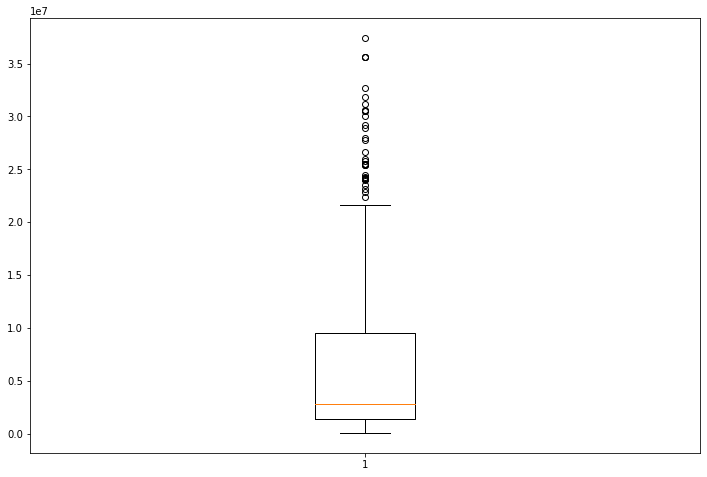

In [42]:
plt.figure(figsize=(12,8))
plt.boxplot(df['SALARIES'])